# Bài tập lập trình: Softmax Regression với TensorFlow Keras

### Hướng dẫn làm bài 
- Trong bài tập này bạn sẽ sử dụng Python 3 và TensorFlow/Keras.
- Sau khi bạn viết Code của mình xong, hãy chạy dòng Code đó để xem kết quả bên dưới. 

### [Quan trọng] Chú ý
- **Không sử dụng hàm `input()` tại bất kỳ dòng lệnh nào**
- **Không thay đổi dòng code return của hàm**

Các bạn sẽ thực hiện `code` trong các phần hiển thị `#TODO: Lập trình tại đây` và thay thế các vị trí `None`. Có những câu hỏi chỉ cần trả về đáp án.

Sau khi viết xong Code của bạn, bạn hãy ấn "SHIFT"+"ENTER" để thực hiện chạy lệnh của Cell đó. 

---
Điểm số:
* 10 điểm / Câu

Tiêu chí chấm điểm:
* Các bài tập sẽ được chấm dựa trên các Test-case.
* Các bạn không khởi tạo lại giá trị đầu vào bên trong hàm. Có thể khởi tạo các giá trị này ngoài hàm nhằm mục đích kiểm thử.

## Import thư viện

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


## 1. Tải dữ liệu MNIST

In [2]:
# Load MNIST dataset
(X_train, Y_train), (X_val, Y_val) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {Y_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Validation labels shape: {Y_val.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Validation data shape: (10000, 28, 28)
Validation labels shape: (10000,)


## 2. Tiền xử lý dữ liệu

### 2.1. Chuẩn hóa và reshape dữ liệu

```TODO 1:``` Viết hàm tiền xử lý dữ liệu

In [ ]:
def preprocess_data(X_train, Y_train, X_val, Y_val, num_classes=10):
    """
    Tiền xử lý dữ liệu MNIST cho Softmax Regression
    Đầu vào:
        X_train: numpy array, ảnh training (60000, 28, 28)
        Y_train: numpy array, nhãn training (60000,)
        X_val: numpy array, ảnh validation (10000, 28, 28)
        Y_val: numpy array, nhãn validation (10000,)
        num_classes: int, số lượng lớp (10)
    Đầu ra:
        Tuple: (X_train_processed, Y_train_processed, X_val_processed, Y_val_processed)
    """
    # TODO: Lập trình tại đây
    
    # Bước 1: Reshape ảnh từ (batch_size, 28, 28) thành (batch_size, 784)
    X_train_processed = tf.reshape(X_train, (X_train.shape[0], -1))
    X_val_processed = tf.reshape(X_val, (X_val.shape[0], -1))

    # Bước 2: Chuẩn hóa pixel values từ [0, 255] thành [0, 1]
    X_train_processed = X_train_processed / 255.0
    X_val_processed = X_val_processed / 255.0
    
    # Bước 3: Chuyển đổi nhãn thành categorical (one-hot encoding)
    Y_train_processed = tf.one_hot(Y_train, num_classes)
    Y_val_processed = tf.one_hot(Y_val, num_classes)

    return X_train_processed, Y_train_processed, X_val_processed, Y_val_processed

Test code

In [4]:
# Test function
try:
    X_train_proc, Y_train_proc, X_val_proc, Y_val_proc = preprocess_data(X_train, Y_train, X_val, Y_val)
    
    print(f"Processed training data shape: {X_train_proc.shape}")
    print(f"Processed training labels shape: {Y_train_proc.shape}")
    print(f"Processed validation data shape: {X_val_proc.shape}")
    print(f"Processed validation labels shape: {Y_val_proc.shape}")
    print(f"Pixel value range: [{X_train_proc.min():.3f}, {X_train_proc.max():.3f}]")
    print(f"First label one-hot: {Y_train_proc[0]}")
except Exception as e:
    print("Lỗi thực thi: ", e)

Processed training data shape: (60000, 784)
Processed training labels shape: (60000, 10)
Processed validation data shape: (10000, 784)
Processed validation labels shape: (10000, 10)
Pixel value range: [0.000, 1.000]
First label one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Kết quả mong đợi:**

```
Processed training data shape: (60000, 784)
Processed training labels shape: (60000, 10)
Processed validation data shape: (10000, 784)
Processed validation labels shape: (10000, 10)
Pixel value range: [0.000, 1.000]
First label one-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
```

## 3. Xây dựng mô hình Softmax Regression với Keras

### 3.1. Tạo mô hình Sequential

```TODO 2:``` Xây dựng mô hình Softmax Regression

In [5]:
def create_softmax_model(input_dim=784, num_classes=10):
    """
    Tạo mô hình Softmax Regression sử dụng Keras Sequential API
    Đầu vào:
        input_dim: int, số chiều đầu vào (784 cho MNIST)
        num_classes: int, số lượng lớp (10 cho MNIST)
    Đầu ra:
        model: tf.keras.Model object
    """
    # TODO: Lập trình tại đây
    
    # Tạo mô hình Sequential
    model = tf.keras.Sequential()
    
    # Thêm Dense layer với activation='softmax'
    model.add(tf.keras.layers.InputLayer(input_shape=(input_dim,)))
    # Lưu ý: Không cần hidden layer, chỉ cần 1 Dense layer duy nhất
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

    return model

Test code

In [6]:
# Tạo mô hình
try:
    model = create_softmax_model()
    
    # Hiển thị thông tin mô hình
    model.summary()
    
    # Kiểm tra số tham số
    total_params = model.count_params()
    expected_params = 784 * 10 + 10  # weights + biases
    print(f"Total parameters: {total_params}")
    print(f"Expected parameters: {expected_params}")
    print(f"Correct number of parameters: {total_params == expected_params}")
except Exception as e:
    print("Lỗi thực thi: ", e)

d:\Code\ProtonX\tf-foundation\softmax-regression-tutorial\softmax-regression-tensorflow\.venv\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

Total parameters: 7850
Expected parameters: 7850
Correct number of parameters: True


### 3.2. Compile mô hình

```TODO 3:``` Compile mô hình với optimizer, loss function và metrics phù hợp

In [10]:
def compile_model(model, learning_rate=0.01):
    """
    Compile mô hình với optimizer, loss function và metrics
    Đầu vào:
        model: tf.keras.Model object
        learning_rate: float, tốc độ học
    Đầu ra:
        model: compiled model
    """
    # TODO: Lập trình tại đây
    
    # Chọn optimizer (sử dụng SGD với learning rate được chỉ định)
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    
    # Chọn loss function (categorical crossentropy cho multi-class classification)
    loss_function = tf.keras.losses.CategoricalCrossentropy()

    # Chọn metrics (accuracy)
    metrics = tf.keras.metrics.CategoricalAccuracy()
    
    # Compile model
    model.compile(
        optimizer=optimizer,
        loss=loss_function,
        metrics=[metrics]
    )
    
    return model

Test code

In [11]:
# Compile mô hình
try:
    model = compile_model(model, learning_rate=0.01)
    print("Model compiled successfully!")
except Exception as e:
    print("Lỗi thực thi: ", e)

Model compiled successfully!


## 4. Training mô hình

### 4.1. Thiết kế callback functions

```TODO 4:``` Tạo callback functions để theo dõi quá trình training

In [12]:
def create_callbacks():
    """
    Tạo callback functions cho training process
    Đầu ra:
        callbacks: list of callback functions
    """
    # TODO: Lập trình tại đây
    
    callbacks = []
    
    # Early Stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    # Learning Rate Reduction callback
    lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        min_lr=1e-6
    )

    callbacks.append(early_stopping)
    callbacks.append(lr_reduction)
    
    return callbacks

Test code

In [13]:
try:
    callbacks = create_callbacks()
    print(f"Created {len(callbacks)} callbacks")
    for i, callback in enumerate(callbacks):
        print(f"Callback {i+1}: {type(callback).__name__}")
except Exception as e:
    print("Lỗi thực thi: ", e)

Created 2 callbacks
Callback 1: EarlyStopping
Callback 2: ReduceLROnPlateau


### 4.2. Training mô hình

```TODO 5:``` Huấn luyện mô hình

In [14]:
def train_model(model, X_train, Y_train, X_val, Y_val, epochs=50, batch_size=128, callbacks=None):
    """
    Huấn luyện mô hình Softmax Regression
    Đầu vào:
        model: tf.keras.Model object
        X_train, Y_train: training data và labels
        X_val, Y_val: validation data và labels  
        epochs: int, số epochs
        batch_size: int, kích thước batch
        callbacks: list of callbacks
    Đầu ra:
        history: training history object
    """
    # TODO: Lập trình tại đây
    
    history = tf.keras.models.Model.fit(
        model,
        X_train, Y_train,
        validation_data=(X_val, Y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks
    )
    
    return history

Test code

In [15]:
# Train mô hình
try:
    history = train_model(
        model, 
        X_train_proc, Y_train_proc, 
        X_val_proc, Y_val_proc, 
        epochs=30, 
        batch_size=128,
        callbacks=callbacks
    )
    print("Training completed!")
except Exception as e:
    print("Lỗi thực thi: ", e)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.6852 - loss: 1.3031 - val_categorical_accuracy: 0.8241 - val_loss: 0.8217 - learning_rate: 0.0100
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.8353 - loss: 0.7251 - val_categorical_accuracy: 0.8580 - val_loss: 0.6134 - learning_rate: 0.0100
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.8567 - loss: 0.5935 - val_categorical_accuracy: 0.8704 - val_loss: 0.5301 - learning_rate: 0.0100
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8669 - loss: 0.5304 - val_categorical_accuracy: 0.8781 - val_loss: 0.4835 - learning_rate: 0.0100
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.8734 - loss: 0.4920 - val_categorical_accuracy: 0.8849 - val_loss: 0.4532 - learning_rate: 0.0100
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.8786 - loss: 0.4656 - val_categorical_accu

## 5. Đánh giá mô hình

### 5.1. Vẽ đồ thị training history

```TODO 6:``` Tạo hàm vẽ đồ thị loss và accuracy

In [19]:
def plot_training_history(history):
    """
    Vẽ đồ thị training history (loss và accuracy)
    Đầu vào:
        history: training history object
    """
    # TODO: Lập trình tại đây
    
    # Tạo subplot với 2 đồ thị
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Đồ thị Loss
    # Plot training & validation loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)      
    
    # Đồ thị Accuracy  
    # Plot training & validation accuracy
    ax2.plot(history.history['categorical_accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

Test code

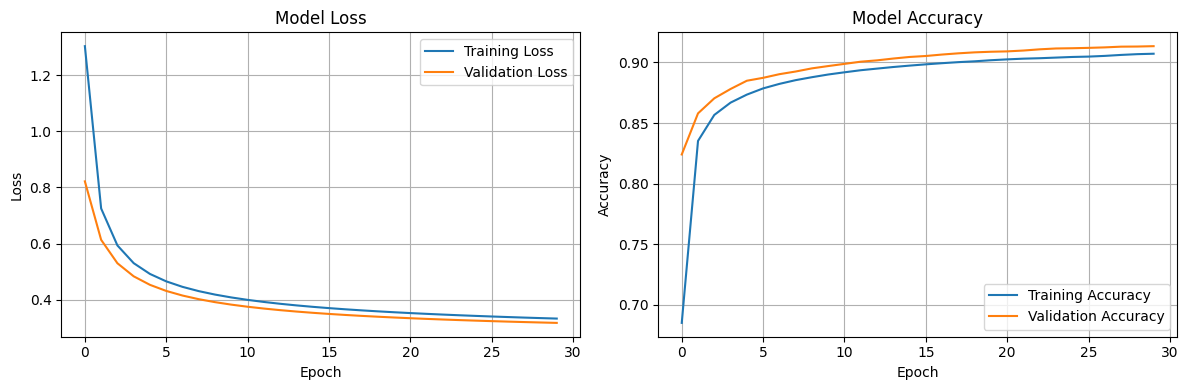

In [20]:
# Vẽ đồ thị
try:
    plot_training_history(history)
except Exception as e:
    print("Lỗi thực thi: ", e)

### 5.2. Tính toán metrics chi tiết

```TODO 7:``` Tính toán và hiển thị metrics chi tiết

In [21]:
def evaluate_model(model, X_test, Y_test_categorical, Y_test_original):
    """
    Đánh giá mô hình và hiển thị metrics chi tiết
    Đầu vào:
        model: trained model
        X_test: test data
        Y_test_categorical: test labels (one-hot)
        Y_test_original: test labels (original format)
    """
    # TODO: Lập trình tại đây
    
    # Dự đoán trên test set
    predictions = tf.keras.models.Model.predict(model, X_test)
    predicted_classes = tf.argmax(predictions, axis=1).numpy()
    
    # Tính accuracy
    test_accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_classes, Y_test_original), tf.float32)).numpy()
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Classification report
    print("Classification Report:")
    print(tf.keras.metrics.CategoricalAccuracy()(Y_test_categorical, predictions))
    print(classification_report(Y_test_original, predicted_classes, digits=4))
    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = tf.math.confusion_matrix(Y_test_original, predicted_classes).numpy()
    print(cm)
    
    # Vẽ confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    return test_accuracy, predictions

Test code

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
Test Accuracy: 0.9134
Classification Report:
tf.Tensor(0.9134, shape=(), dtype=float32)
              precision    recall  f1-score   support

           0     0.9357    0.9796    0.9571       980
           1     0.9574    0.9709    0.9641      1135
           2     0.9214    0.8750    0.8976      1032
           3     0.8974    0.9010    0.8992      1010
           4     0.9036    0.9257    0.9145       982
           5     0.9096    0.8464    0.8769       892
           6     0.9292    0.9457    0.9374       958
           7     0.9201    0.9076    0.9138      1028
           8     0.8638    0.8789    0.8712       974
           9     0.8885    0.8920    0.8902      1009

    accuracy                         0.9134     10000
   macro avg     0.9127    0.9123    0.9122     10000
weighted avg     0.9134    0.9134    0.9131     10000


Confusion Matrix:
[[ 960    0    2    2    1    2    9    1    3    0]
 [   0 1102    2    4    1    2    4  

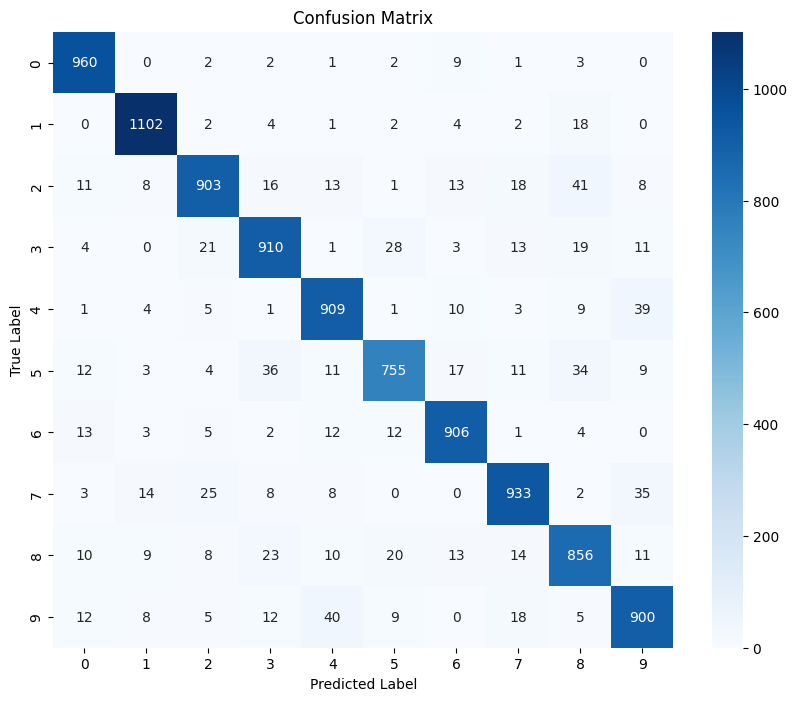


Final Test Accuracy: 0.9134


In [22]:
# Đánh giá mô hình
try:
    test_acc, predictions = evaluate_model(model, X_val_proc, Y_val_proc, Y_val)
    print(f"\nFinal Test Accuracy: {test_acc:.4f}")
except Exception as e:
    print("Lỗi thực thi: ", e)

### 5.3. Visualize predictions

```TODO 8:``` Tạo hàm hiển thị một số predictions

In [25]:
def visualize_predictions(X_test, Y_test, predictions, num_samples=10):
    """
    Hiển thị một số ảnh với predictions
    Đầu vào:
        X_test: test images (flattened)
        Y_test: true labels
        predictions: model predictions
        num_samples: số lượng mẫu hiển thị
    """
    # TODO: Lập trình tại đây
    
    # Reshape lại ảnh từ (784,) thành (28, 28)
    X_images = tf.reshape(X_test, (-1, 28, 28)).numpy()
    
    # Random chọn indices
    indices = np.random.choice(X_images.shape[0], num_samples, replace=False)

    # Tạo subplot
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.ravel()
    
    
    for i, idx in enumerate(indices):
        # Hiển thị ảnh
        
        # Lấy true label và predicted label
        true_label = Y_test[idx]
        pred_label = tf.argmax(predictions[idx]).numpy()
        confidence = tf.reduce_max(predictions[idx]).numpy()
        
        # Set title và color
        color = 'green' if true_label == pred_label else 'red'
        
        axes[i].imshow(X_images[idx], cmap='gray')
        axes[i].set_title(f"True: {true_label}\nPred: {pred_label} ({confidence:.2f})", color=color)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

Test code

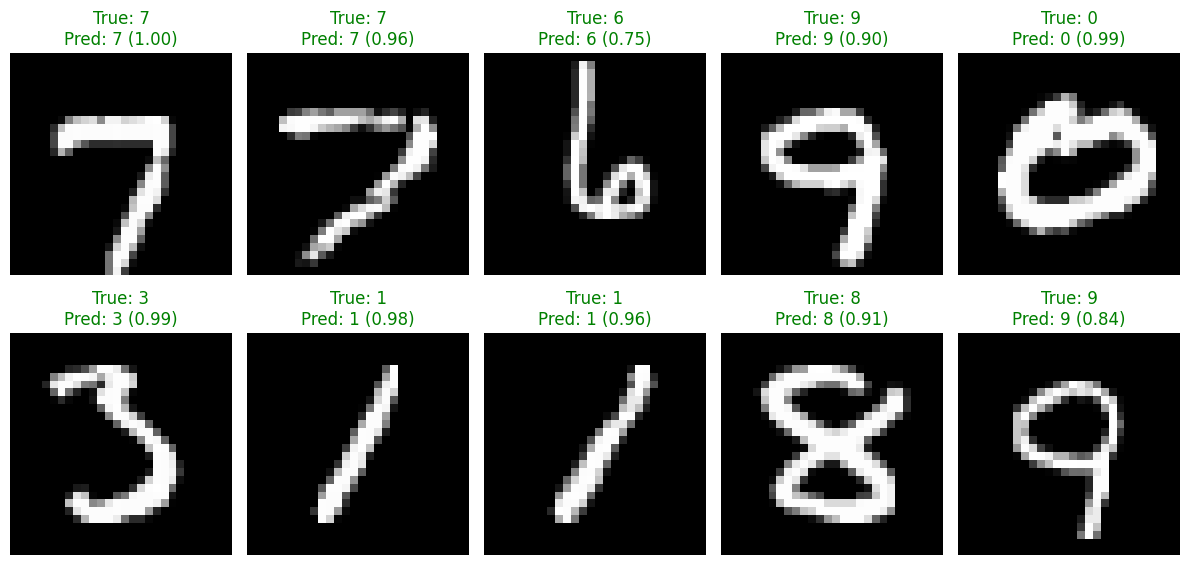

In [26]:
# Hiển thị predictions
try:
    visualize_predictions(X_val_proc, Y_val, predictions, num_samples=10)
except Exception as e:
    print("Lỗi thực thi: ", e)

## Kết thúc bài tập

Chúc mừng bạn đã hoàn thành bài tập về Softmax Regression với TensorFlow Keras! Hãy chắc chắn rằng bạn đã hoàn thành tất cả các phần và kiểm tra kỹ lưỡng kết quả của mình trước khi nộp bài.